This is an example notebook demonstrating the process of opening a single CMOST FITS file, displaying its properties and plotting the frames.

In [1]:
import sys
sys.path.append('..')
from cmost_exposure import Exposure

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 14, 'family' : 'sans-serif'}
matplotlib.rc('font', **font)

data_dir = '../data'

In [14]:
# Load exposure from its filepath
ex = Exposure('{}/100720/cmost001_20201007031546.fits'.format(data_dir),cleanup=False)
#ex = Exposure('{}/012621/cmostjpl006_20210127043652.fits'.format(data_dir),cleanup=False)

print(ex.get_info())

 Properties: 
		Readout mode: DEFAULT 
		Date: 2020-10-07T03:59:08.004711 
		Exposure time: 999999.0 ms
		LED voltage: 1.62 V 
		Temperature: -1.0 K
		Camera ID:  
		Detector ID: 
		Gain mode: 
		Number of frames: 2
		


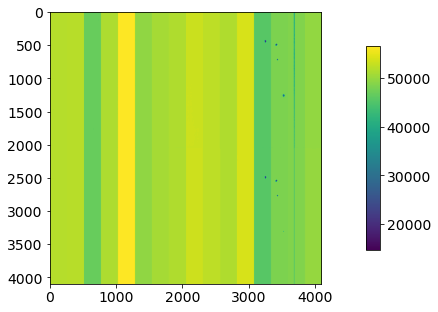

In [11]:
# Plot the raw image
plt.figure(figsize=[16,5])
plt.imshow(ex.raw_frames[0])
plt.colorbar(fraction=0.05, aspect=15, shrink=0.75)
plt.savefig('plots/20210203_raw_image.pdf')
plt.show()
plt.close()

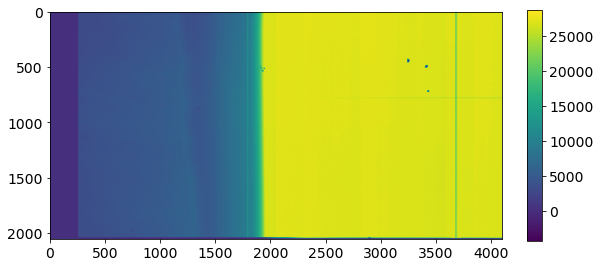

In [4]:
# Plot the CDS image
plt.figure(figsize=[9,5])
plt.imshow(ex.cds_frames[0])
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85)
plt.savefig('plots/20210203_cds_image.pdf')
plt.show()
plt.close()

In [5]:
# Histogram of pixel values
hist, bin_edges = np.histogram(ex.cds_frames[0], bins=100, range=(-5000,30000))

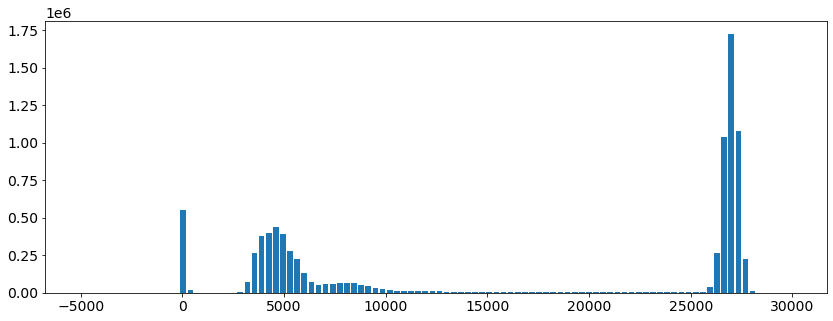

In [6]:
# Histogram of pixel values
plt.figure(figsize=[14,5])
plt.bar(bin_edges[:-1],hist,width=0.8*(bin_edges[1]-bin_edges[0]),align="edge")
plt.savefig('plots/20210203_histogram.pdf')
plt.show()
plt.close()